In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, mean_absolute_error
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import LinearRegression

# Linear and Logistic regression assignment

## Business Understanding

## Data understanding

## Data preparation

In [9]:
real_estate_valuation = fetch_ucirepo(id=477) 

data = real_estate_valuation.data.original

X = data.drop(columns=['Y house price of unit area', 'No'])
y = data['Y house price of unit area']

## Modeling

### Linear Regression

Mean absolute error: 6.07

Overall Model Intercept: -12673.49
Overall Model Coefficients:
  X1 transaction date: 6.4858
  X2 house age: -0.3023
  X3 distance to the nearest MRT station: -0.0052
  X4 number of convenience stores: 1.1343
  X5 latitude: 186.9275
  X6 longitude: -41.1917

X1 transaction date:
  Intercept: -8461.35, Coefficient: 4.2219


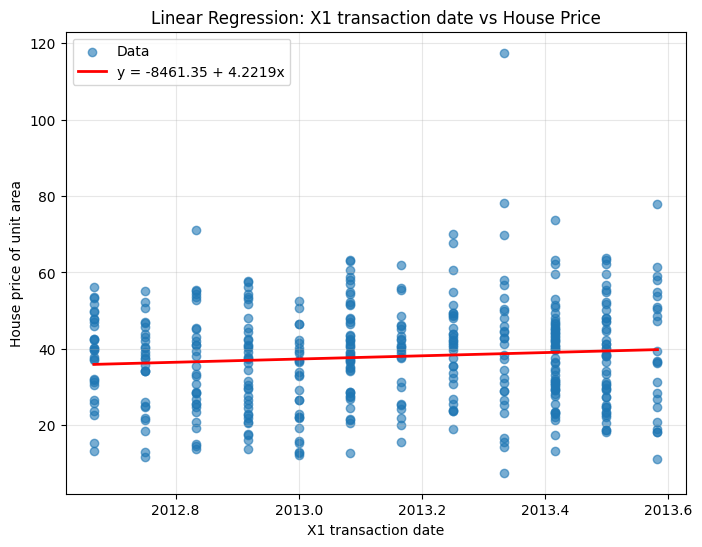


X2 house age:
  Intercept: 42.43, Coefficient: -0.2515


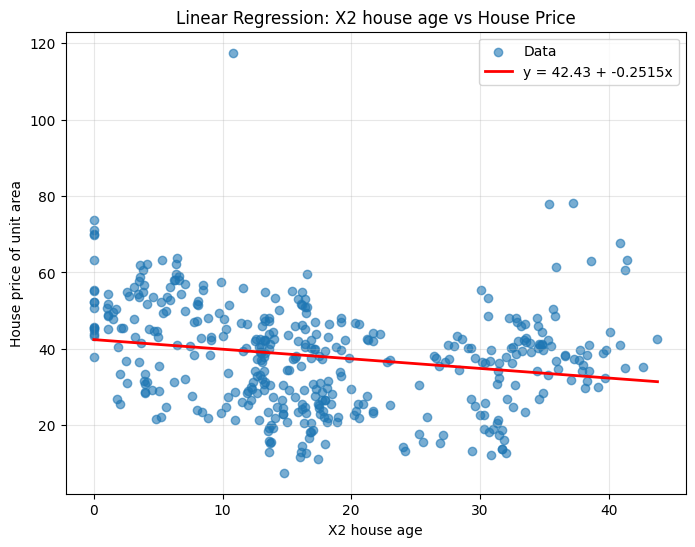


X3 distance to the nearest MRT station:
  Intercept: 45.85, Coefficient: -0.0073


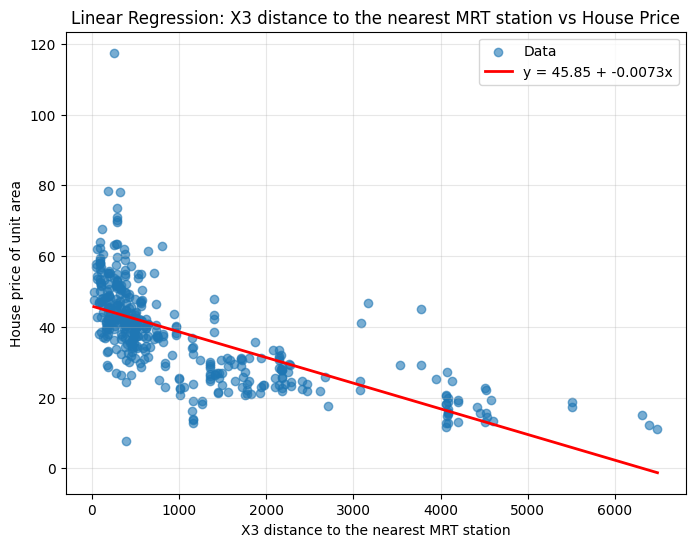


X4 number of convenience stores:
  Intercept: 27.18, Coefficient: 2.6377


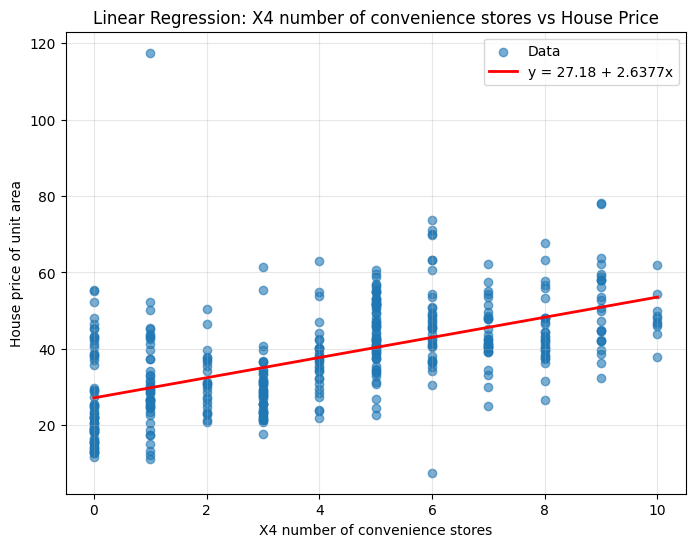


X5 latitude:
  Intercept: -14917.68, Coefficient: 598.9683


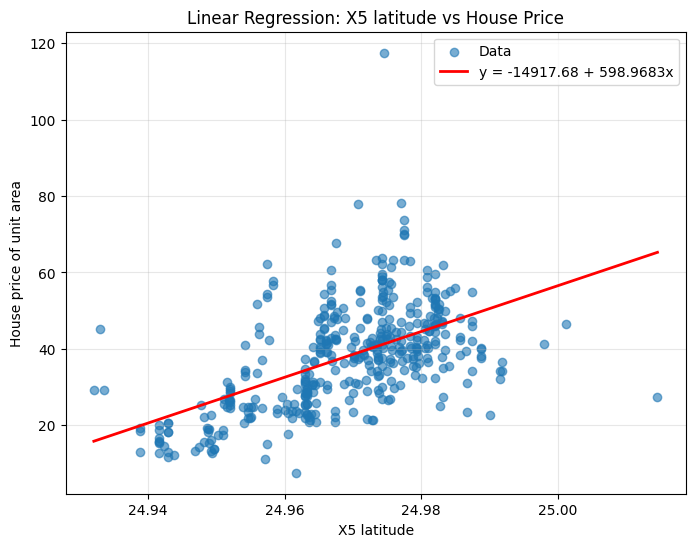


X6 longitude:
  Intercept: -56345.57, Coefficient: 463.9347


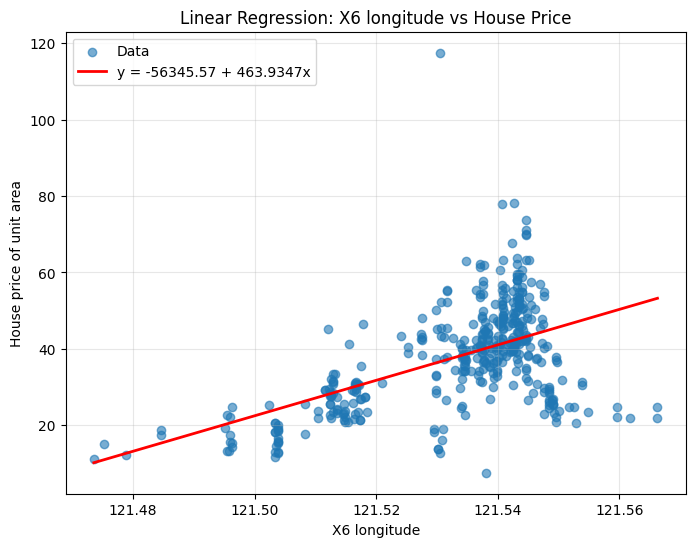

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=55)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_test_pred = model.predict(X_test)
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_pred))

# Print overall model parameters
print(f"\nOverall Model Intercept: {model.intercept_:.2f}")
print("Overall Model Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"  {col}: {coef:.4f}")

for column in X.columns:
    # Train a separate model for THIS feature only
    single_model = LinearRegression()
    X_single = X[[column]]  # Use double brackets to keep 2D shape
    single_model.fit(X_single, y)
    
    # Get parameters for this specific feature
    b0 = single_model.intercept_
    b1 = single_model.coef_[0]
    
    # Create line for this feature
    xs = np.linspace(X[column].min(), X[column].max(), 100)
    ys = b0 + b1 * xs
    
    # Print parameters
    print(f"\n{column}:")
    print(f"  Intercept: {b0:.2f}, Coefficient: {b1:.4f}")
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X[column], y, alpha=0.6, label='Data')
    plt.plot(xs, ys, 'r-', linewidth=2, label=f'y = {b0:.2f} + {b1:.4f}x')
    plt.xlabel(column)
    plt.ylabel('House price of unit area')
    plt.title(f'Linear Regression: {column} vs House Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

### Logistic Regression

In [11]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Calculate average (mean) from TRAINING set only
average_price = y_train.mean()
print(f"Average house price in training set: {average_price:.2f}")

# Step 3: Convert continuous target to binary (0 or 1)
# 0 = below average, 1 = above average
y_train_binary = (y_train > average_price).astype(int)
y_test_binary = (y_test > average_price).astype(int)

print(f"\nTraining set distribution:")
print(f"  Below average (0): {(y_train_binary == 0).sum()}")
print(f"  Above average (1): {(y_train_binary == 1).sum()}")

# Step 4: Train Logistic Regression classifier
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train_binary)

Average house price in training set: 38.39

Training set distribution:
  Below average (0): 157
  Above average (1): 174


LogisticRegression(max_iter=1000)

## Evaluation

### Logistic Regression


MODEL PARAMETERS
Intercept: -0.6257

Coefficients:
  X1 transaction date: 0.2321
  X2 house age: -0.6119
  X3 distance to the nearest MRT station: -2.3830
  X4 number of convenience stores: 0.5533
  X5 latitude: 0.9400
  X6 longitude: -0.1323

MODEL EVALUATION
Training Accuracy: 82.48%
Test Accuracy: 81.93%


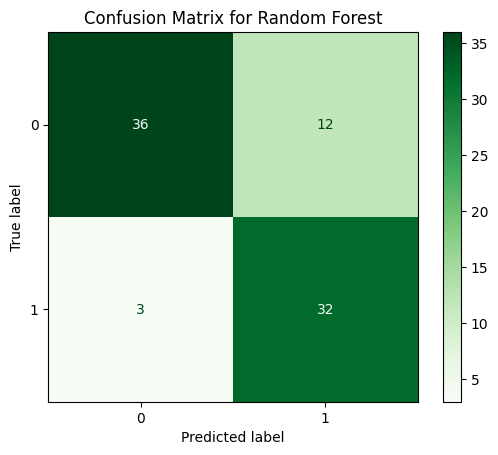


Classification Report (Test Set):
               precision    recall  f1-score   support

Below Average       0.92      0.75      0.83        48
Above Average       0.73      0.91      0.81        35

     accuracy                           0.82        83
    macro avg       0.83      0.83      0.82        83
 weighted avg       0.84      0.82      0.82        83


Sample Predictions:
Actual | Predicted | Probability [Below, Above]
--------------------------------------------------
  1    |     1     | [0.11845669 0.88154331]
  1    |     1     | [0.3883899 0.6116101]
  1    |     1     | [0.1567068 0.8432932]
  0    |     1     | [0.27222496 0.72777504]
  0    |     0     | [0.97596088 0.02403912]


In [13]:
print("\n" + "="*60)
print("MODEL PARAMETERS")
print("="*60)
print(f"Intercept: {model.intercept_[0]:.4f}")
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"  {feature}: {coef:.4f}")

# Step 5: Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)

train_accuracy = accuracy_score(y_train_binary, y_train_pred)
test_accuracy = accuracy_score(y_test_binary, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2%}")
print(f"Test Accuracy: {test_accuracy:.2%}")

# Confusion Matrix

cm = confusion_matrix(y_test_binary, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix for Random Forest")

plt.show()

# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test_binary, y_test_pred, 
                          target_names=['Below Average', 'Above Average']))

# Prediction Probabilities
y_test_proba = model.predict_proba(X_test)
print("\nSample Predictions:")
print("Actual | Predicted | Probability [Below, Above]")
print("-" * 50)
for i in range(min(5, len(y_test))):
    print(f"  {y_test_binary.iloc[i]}    |     {y_test_pred[i]}     | {y_test_proba[i]}")

In [14]:
features = X.columns.tolist()

Xi = pd.DataFrame(columns=features)

for f in features:
    val = input(f"Enter value for feature {f}: ")
    Xi[f] = [float(val)]

Xi_scaled = pd.DataFrame(scaler.transform(Xi), columns=Xi.columns)

# Get BOTH probabilities
probabilities = model.predict_proba(Xi_scaled)[0]  # Get the full array
p_below = probabilities[0]  # Probability of class 0 (below average)
p_above = probabilities[1]  # Probability of class 1 (above average)

# Display both
print("\n" + "="*60)
print(f"Probability of house price BELOW average: {p_below:.2%}")
print(f"Probability of house price ABOVE average: {p_above:.2%}")
print("="*60)


Probability of house price BELOW average: 100.00%
Probability of house price ABOVE average: 0.00%


## Deployment